In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing of Data
df = pd.read_csv('retail_sales_dataset_with_marketing.csv')

#First 5 rows
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Marketing Spend
0,1,2023-11-24,cust001,male,34,beauty,3,50,150,30.0
1,2,2023-02-27,cust002,female,26,clothing,2,500,1000,110.0
2,3,2023-01-13,cust003,male,50,electronics,1,30,30,8.0
3,4,2023-05-21,cust004,male,37,clothing,1,500,500,55.0
4,5,2023-05-06,cust005,male,30,beauty,2,50,100,20.0


In [3]:
#For statistical Analysis
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Marketing Spend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,58.170000
std,288.819436,13.68143,1.132734,189.681356,559.997632,58.353266
min,1.000000,18.00000,1.000000,25.000000,25.000000,7.500000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,16.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,32.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,105.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,220.000000


In [4]:
#Size of dataset
df.shape

(1000, 10)

In [5]:
#Column headers
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Marketing Spend'],
      dtype='object')

In [6]:
#Checking Any Null Values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Marketing Spend     0
dtype: int64

In [7]:
#Checking Any Duplicate Values
df.duplicated().sum()

0

In [8]:
#Checking Data Types
df.dtypes

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Quantity              int64
Price per Unit        int64
Total Amount          int64
Marketing Spend     float64
dtype: object

In [9]:
#Correcting date data type from object to datetime
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [10]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Marketing Spend            float64
dtype: object

In [11]:
# Ensure consistency in categorical columns
df['Customer ID'] = df['Customer ID'].str.strip().str.lower()
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Product Category'] = df['Product Category'].str.strip().str.lower()

In [12]:
#Distinct Counts
cols = ['Gender','Product Category','Quantity'] 

for col in cols:
    print(f'Value counts for "{col}":')
    print(df[col].value_counts())

Value counts for "Gender":
Gender
female    510
male      490
Name: count, dtype: int64
Value counts for "Product Category":
Product Category
clothing       351
electronics    342
beauty         307
Name: count, dtype: int64
Value counts for "Quantity":
Quantity
4    263
1    253
2    243
3    241
Name: count, dtype: int64


In [13]:
#Monthwise total customers
month = df.groupby(df['Date'].dt.month)['Customer ID'].size().reset_index(name='Total Customers').sort_values(by='Total Customers',ascending=False)
month.head(5)

,Date,Total Customers
4,5,105
9,10,96
7,8,94
11,12,91
3,4,86


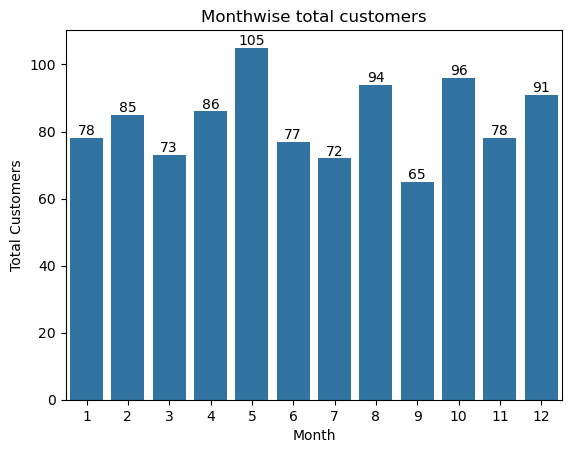

In [14]:
ax = sns.barplot(x='Date',y='Total Customers',data=month,)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Monthwise total customers')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.show()

In [15]:
#Find the total revenue for each product Category.

product_Revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index(name='Revenue')
product_Revenue

,Product Category,Revenue
0,beauty,143515
1,clothing,155580
2,electronics,156905


Text(0, 0.5, 'Product Category')

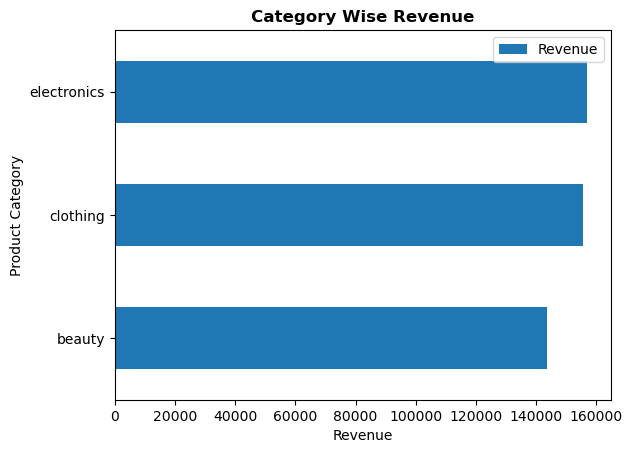

In [16]:
product_Revenue.plot(kind= 'barh',y ='Revenue',x='Product Category')
plt.title('Category Wise Revenue',fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('Product Category')

In [17]:
pd.pivot_table(df,values='Total Amount',index='Product Category',columns='Gender',aggfunc='mean')

Gender,female,male
Product Category,,
beauty,450.783133,487.127660
clothing,467.097701,419.802260
electronics,451.382353,466.104651


In [18]:
#Weekly Quantity sold

weekly_qty_sold = df.groupby(['Product Category',pd.Grouper(key='Date',freq='W')])['Quantity'].sum().reset_index(name='Weekly Qty Sold')
weekly_qty = weekly_qty_sold.sort_values(by='Weekly Qty Sold',ascending=False)
weekly_qty.head()

,Product Category,Date,Weekly Qty Sold
110,electronics,2023-02-05,35
74,clothing,2023-05-28,35
125,electronics,2023-05-21,33
154,electronics,2023-12-10,33
65,clothing,2023-03-26,33


In [19]:
#Compute average weekly units sold for Product A and Product B

beauty = weekly_qty[weekly_qty['Product Category'] == 'beauty']['Weekly Qty Sold'].mean()
print(f'The beauty Avg weekly sold are',beauty)

electronics = weekly_qty[weekly_qty['Product Category'] == 'electronics']['Weekly Qty Sold'].mean()
print(f'The electronicss Avg weekly sold are',electronics)

The beauty Avg weekly sold are 14.547169811320755
The electronicss Avg weekly sold are 16.0188679245283


In [20]:
#Identify which week had the highest sales overall.  

weekly_revenue = df.groupby(pd.Grouper(key='Date',freq='W'))['Total Amount'].sum()
max_week = weekly_revenue.idxmax()
max_revenue = weekly_revenue.max()
print(f'The Revenue max is in week',max_week,'& max revenue is',max_revenue)

The Revenue max is in week 2023-05-21 00:00:00 & max revenue is 17515


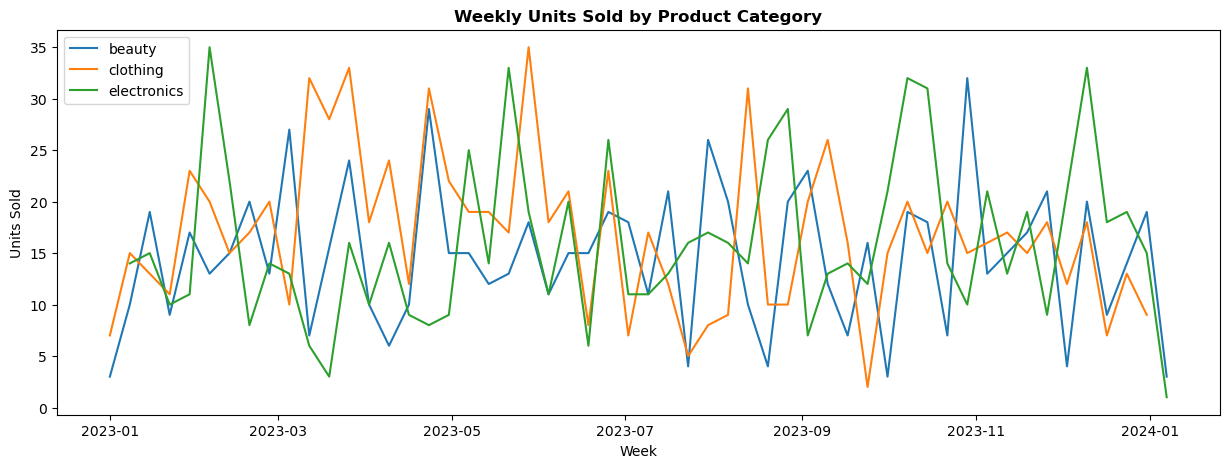

In [21]:
#Line chart of weekly units sold for each product. 

product_category = ['beauty', 'clothing', 'electronics']

plt.figure(figsize=(15,5))
for cat in product_category:
    data = weekly_qty_sold[weekly_qty_sold['Product Category'] == cat]
    plt.plot(data['Date'], data['Weekly Qty Sold'], label=cat)
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.title('Weekly Units Sold by Product Category',fontweight='bold')
plt.legend()
plt.show() 

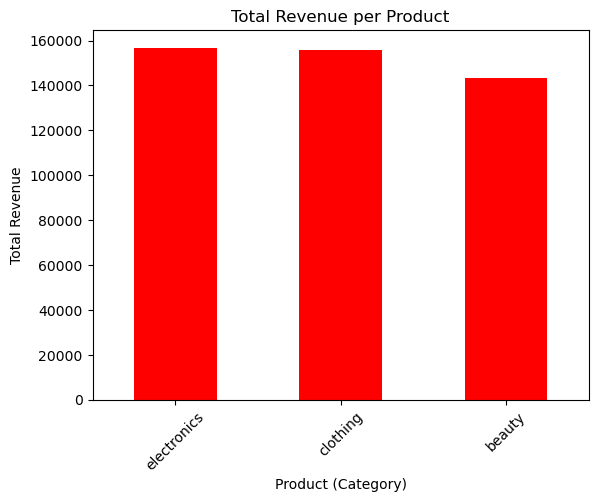

In [22]:
#Bar chart showing total revenue per product.

product_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar',color='red')
plt.title('Total Revenue per Product')
plt.xlabel('Product (Category)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Checking any of sample rows
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Marketing Spend
453,454,2023-02-22,cust454,female,46,beauty,1,25,25,7.5
9,10,2023-10-07,cust010,female,52,clothing,4,50,200,40.0
55,56,2023-05-31,cust056,female,26,clothing,3,300,900,105.0
327,328,2023-03-22,cust328,male,39,beauty,2,50,100,20.0
10,11,2023-02-14,cust011,male,23,clothing,2,50,100,20.0


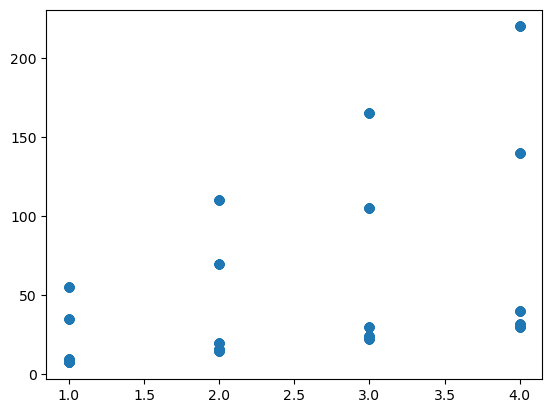

In [24]:
# Scatter plot: Marketing Spend vs Units Sold.

plt.scatter(df['Quantity'],df['Marketing Spend'])

In [25]:
 #Does higher marketing spend correlate with more units sold?

df[['Quantity','Marketing Spend']].corr()

,Quantity,Marketing Spend
Quantity,1.000000,0.455693
Marketing Spend,0.455693,1.000000


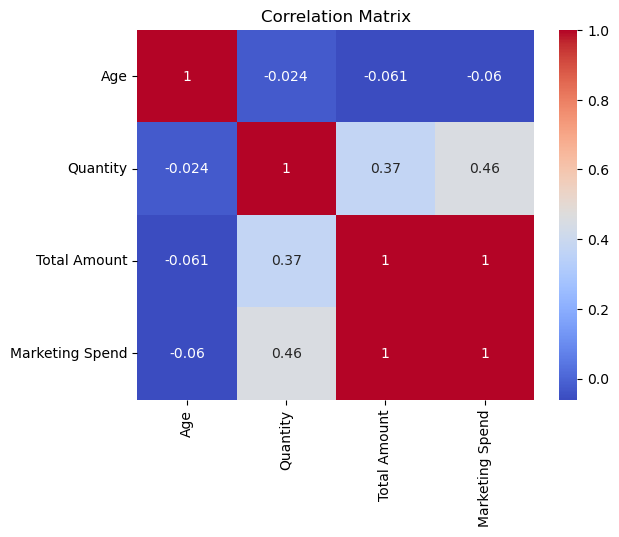

In [26]:
#Heatmap for Correlations checking

corr_matrix = df[['Age', 'Quantity', 'Total Amount', 'Marketing Spend']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Which product shows greater growth over the four weeks? 

#Calculate Weekly Units Sold ---
weekly_sales = df.groupby(
    ['Product Category', pd.Grouper(key='Date', freq='W')]
)['Quantity'].sum().reset_index(name='Weekly Units Sold')

# Assign Week Number
weekly_sales['Week_Number'] = weekly_sales['Date'].dt.isocalendar().week.astype(int)

print(weekly_sales['Week_Number'])

print(pd.Series(weekly_sales['Week_Number'].unique()).sort_values(ascending=False).head(4))

print(pd.Series(weekly_sales['Week_Number'].unique()).sort_values(ascending=True).head(4))

0      52
1       1
2       2
3       3
4       4
       ..
154    49
155    50
156    51
157    52
158     1
Name: Week_Number, Length: 159, dtype: int32
0     52
50    51
49    50
48    49
dtype: int32
1    1
2    2
3    3
4    4
dtype: int32


In [28]:
# Calculate Average Sales for Start (Wk 1-4) and End (Wk 49-52) ---
WEEKS_START = [1, 2, 3, 4]   
WEEKS_END = [49, 50, 51, 52] 

# Average for First 4 Weeks
soy_sales = weekly_sales[weekly_sales['Week_Number'].isin(WEEKS_START)]
avg_soy_sales = soy_sales.groupby('Product Category')['Weekly Units Sold'].mean().rename('Avg_Wk1_4')

# Average for Last 4 Weeks
eoy_sales = weekly_sales[weekly_sales['Week_Number'].isin(WEEKS_END)]
avg_eoy_sales = eoy_sales.groupby('Product Category')['Weekly Units Sold'].mean().rename('Avg_Wk49_52')

print(f'Average of week1-4',avg_soy_sales)

print(f'Average of week49-52',avg_eoy_sales)

Average of week1-4 Product Category
beauty         11.6
clothing       15.5
electronics    10.2
Name: Avg_Wk1_4, dtype: float64
Average of week49-52 Product Category
beauty         13.00
clothing       10.80
electronics    21.25
Name: Avg_Wk49_52, dtype: float64


In [29]:
#Calculate Growth ---
growth_df = pd.merge(avg_soy_sales, avg_eoy_sales, on='Product Category').reset_index()
growth_df['Growth_Wk49-52_minus_Wk1-4'] = growth_df['Avg_Wk49_52'] - growth_df['Avg_Wk1_4']

# Find Greatest Growth ---
max_growth_value = growth_df['Growth_Wk49-52_minus_Wk1-4'].max()
tied_products = growth_df[growth_df['Growth_Wk49-52_minus_Wk1-4'] == max_growth_value]['Product Category'].tolist()

print(growth_df['Growth_Wk49-52_minus_Wk1-4'])

print(f"Tied for greatest growth ({max_growth_value:.2f} units/week): {', '.join([p.capitalize() for p in tied_products])}")

0     1.40
1    -4.70
2    11.05
Name: Growth_Wk49-52_minus_Wk1-4, dtype: float64
Tied for greatest growth (11.05 units/week): Electronics


In [30]:
#Age distrubution

df_age = df['Age'].value_counts().sort_values(ascending=False)
df_age.head()

Age
43    31
64    31
57    30
51    30
34    28
Name: count, dtype: int64

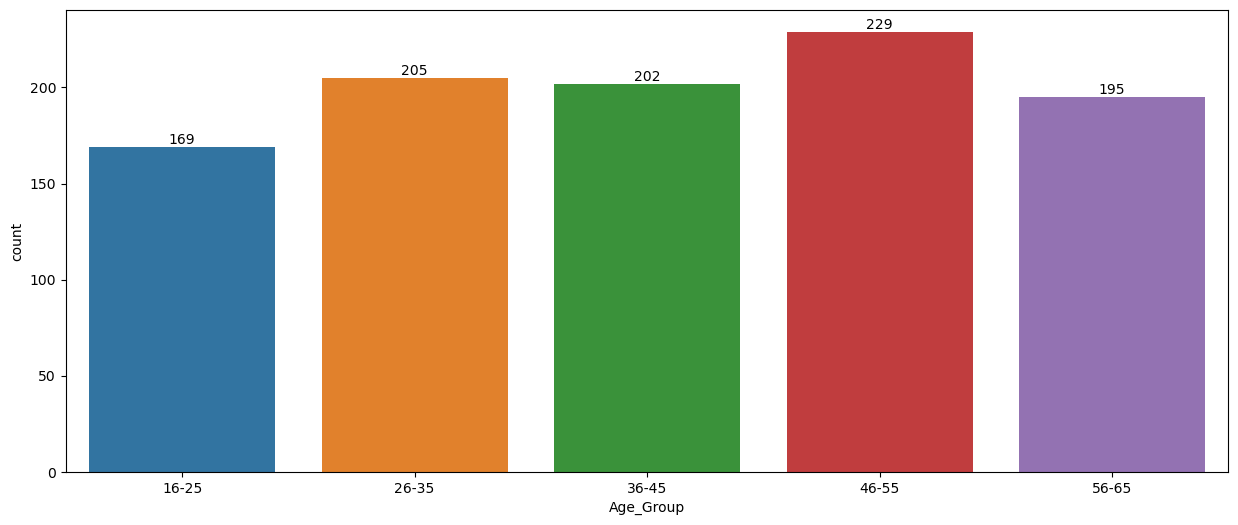

In [31]:
# Create age groups
bins = [16, 26, 36, 46, 56,65]  # Define age range boundaries
labels = ['16-25', '26-35', '36-45', '46-55','56-65']  # Labels for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create bar plot with age groups
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Age_Group', data=df,palette=sns.color_palette("tab10"))
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [32]:
#Relationship between Age and Total Amount by Gender

df_age_to = df.groupby(['Age', 'Gender'])['Total Amount'].mean().reset_index()
df_age_to.sample(5)

,Age,Gender,Total Amount
80,58,female,460.000000
69,52,male,307.777778
75,55,male,338.750000
61,48,male,228.750000
37,36,male,860.714286


Text(0.5, 1.0, 'Relationship between Age and Total Amount by Gender')

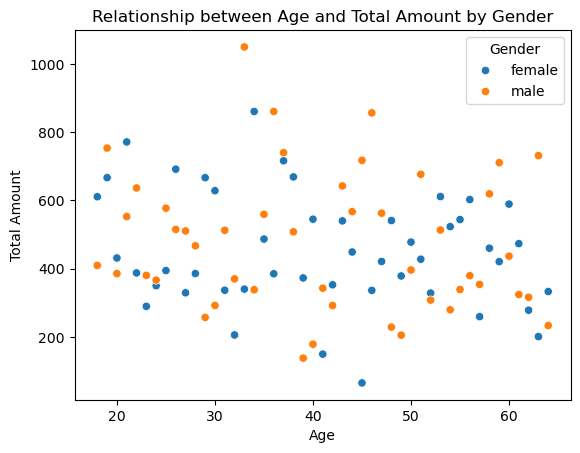

In [33]:
sns.scatterplot(x='Age', y='Total Amount', hue='Gender', data=df_age_to)
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Relationship between Age and Total Amount by Gender')

In [34]:
Q1 = df['Age'].quantile(.25)
Q3 = df['Age'].quantile(.75)
IQR = Q3 - Q1 
up = Q3 + 1.5 * (IQR)
lw = Q1 - 1.5 * (IQR)

In [35]:
print(IQR)
print(f'the Upper Bound is {up} ')
print(f'the lower Bound is {lw} ')

24.0
the Upper Bound is 89.0 
the lower Bound is -7.0 


Product

In [37]:
#Marketing spend whether depend on product category and gender
df_top_Cat = df.groupby(['Product Category','Gender'],as_index=False)['Marketing Spend'].count().sort_values(by='Marketing Spend',ascending=False)
df_top_Cat

,Product Category,Gender,Marketing Spend
3,clothing,male,177
2,clothing,female,174
5,electronics,male,172
4,electronics,female,170
0,beauty,female,166
1,beauty,male,141


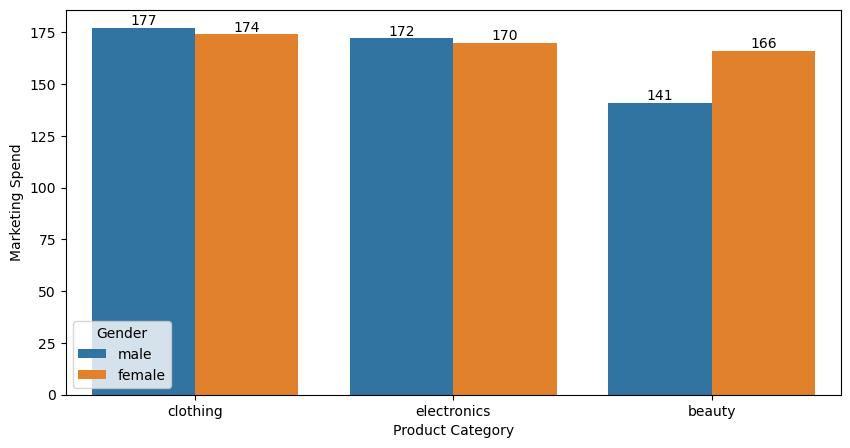

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Product Category',y='Marketing Spend',hue='Gender',data=df_top_Cat)
for bars in ax.containers: 
    ax.bar_label(bars)
plt.show()

In [39]:
df_top_Cat = df.groupby(['Product Category','Age'],as_index=False)['Marketing Spend'].count().sort_values(by='Marketing Spend',ascending=False)
df_top_Cat.head(5)

,Product Category,Age,Marketing Spend
127,electronics,51,14
107,electronics,31,13
93,clothing,64,13
72,clothing,43,13
28,beauty,46,13


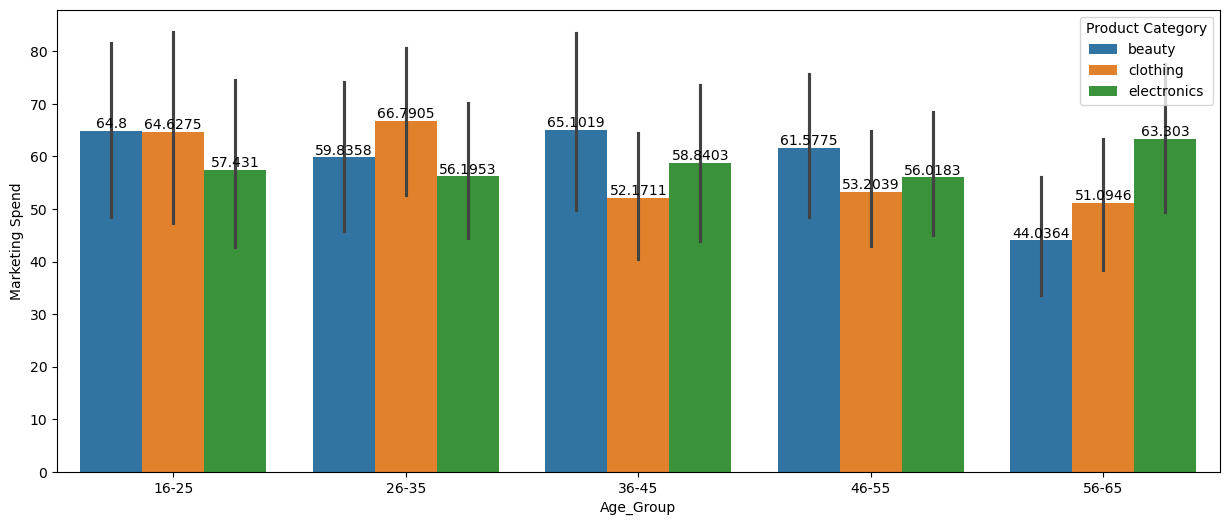

In [40]:
# Create age groups
bins = [16, 26, 36, 46, 56,65]  # Define age range boundaries
labels = ['16-25', '26-35', '36-45', '46-55','56-65']  # Labels for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create bar plot with age groups
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Age_Group',y='Marketing Spend',hue='Product Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [41]:
#Product wise unit price
df_pri = df.groupby(['Product Category'],as_index=False)['Price per Unit'].mean()
df_pri

,Product Category,Price per Unit
0,beauty,184.055375
1,clothing,174.287749
2,electronics,181.900585


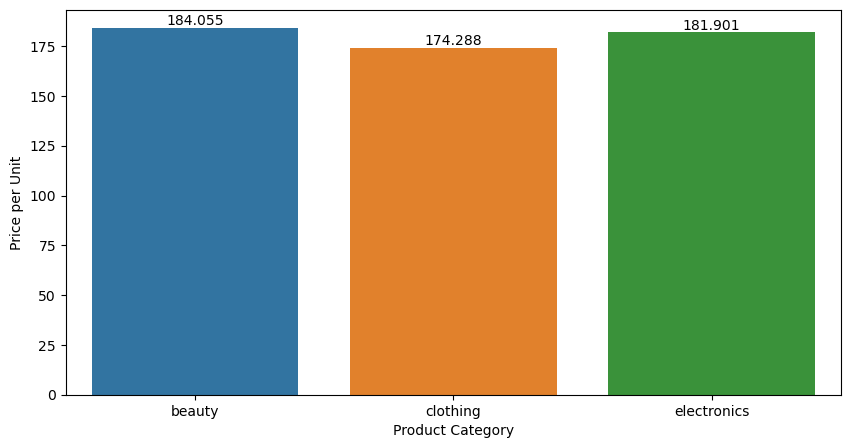

In [42]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Product Category',y='Price per Unit',data=df_pri,palette=sns.color_palette("tab10"))
for bars in ax.containers: 
    ax.bar_label(bars)
plt.show()

In [43]:
#Product category wise total amount
df_tot = df.groupby(['Product Category'],as_index=False)['Total Amount'].mean()
df_tot

,Product Category,Total Amount
0,beauty,467.475570
1,clothing,443.247863
2,electronics,458.786550


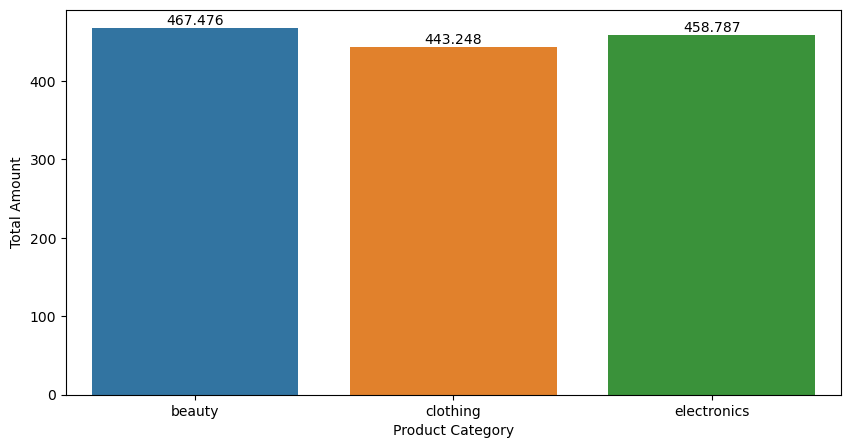

In [44]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Product Category',y='Total Amount',data=df_tot,palette=sns.color_palette("tab10"))
for bars in ax.containers: 
    ax.bar_label(bars)
plt.show()

In [45]:
#Marketing Efficiency 

df['Spend_to_Sales_Ratio'] = df['Marketing Spend'] / df['Total Amount']
ratio_by_category = df.groupby('Product Category')['Spend_to_Sales_Ratio'].mean()
print(ratio_by_category)

Product Category
beauty         0.198360
clothing       0.200209
electronics    0.197963
Name: Spend_to_Sales_Ratio, dtype: float64


In [46]:
#Top Customers

top_customers = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Age': 'mean',
    'Product Category': lambda x: x.mode()[0]
}).nlargest(5, 'Total Amount')
print(top_customers)

             Total Amount   Age Product Category
Customer ID                                     
cust015              2000  42.0      electronics
cust065              2000  51.0      electronics
cust072              2000  20.0      electronics
cust074              2000  18.0           beauty
cust089              2000  55.0      electronics


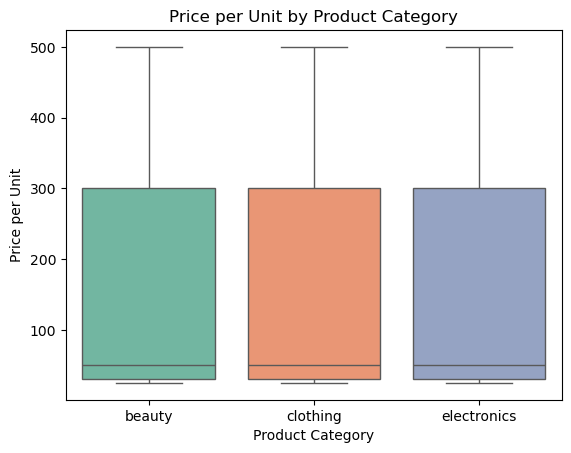

In [47]:

sns.boxplot(x='Product Category', y='Price per Unit', data=df, palette='Set2')
plt.title('Price per Unit by Product Category')
plt.show()

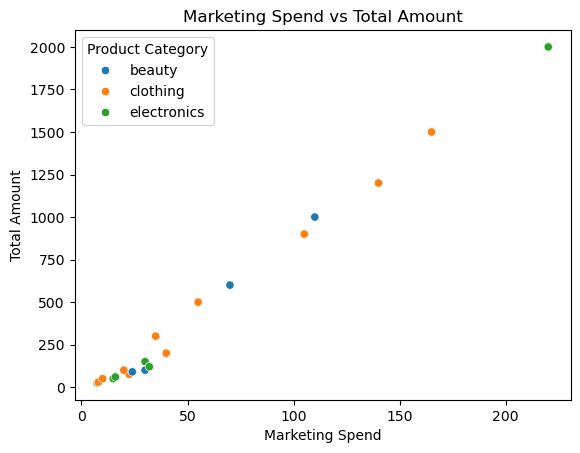

In [48]:
sns.scatterplot(x='Marketing Spend', y='Total Amount', hue='Product Category', data=df)
plt.title('Marketing Spend vs Total Amount')
plt.show()